In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('2024Populations.csv')

In [4]:
df.head(10)

,rank,country,TwoLetterID,unMember,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,landAreaKm,2024YoYChange,2024YoYGrowthRate,2024WorldPercentage,Density_2024
0,1,India,IN,True,696828385,1059633675,1240613620,1428627663,1441719852,1514994080,1670490596,2973190.0,13092189,0.009164,0.177614,484.906734
1,2,China,CN,True,982372466,1264099069,1348191368,1425671352,1425178782,1415605906,1312636325,9424702.9,-492570,-0.000346,0.175577,151.217370
2,3,United States,US,True,223140018,282398554,311182845,339996563,341814420,352162301,375391963,9147420.0,1817857,0.005347,0.042110,37.367304
3,4,Indonesia,ID,True,148177096,214072421,244016173,277534122,279798049,292150100,317225213,1877519.0,2263927,0.008157,0.034470,149.025416
4,5,Pakistan,PK,True,80624057,154369924,194454498,240485658,245209815,274029836,367808468,770880.0,4724157,0.019644,0.030209,318.090773
5,6,Nigeria,NG,True,72951439,122851984,160952853,223804632,229152217,262580426,377459883,910770.0,5347585,0.023894,0.028231,251.602729
6,7,Brazil,BR,True,122288383,175873720,196353492,216422446,217637297,223908968,230885725,8358140.0,1214851,0.005613,0.026812,26.038963
7,8,Bangladesh,BD,True,83929765,129193327,148391139,172954319,174701211,184424144,203904900,130170.0,1746892,0.010100,0.021523,1342.100415
8,9,Russia,RU,True,138257420,146844839,143242599,144444359,143957079,141432741,133133035,16376870.0,-487280,-0.003373,0.017735,8.790268
9,10,Ethiopia,ET,True,34945469,67031867,89237791,126527060,129719719,149296378,214812309,1128571.3,3192659,0.025233,0.015981,114.941536


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 234 non-null    int64  
 1   country              234 non-null    object 
 2   TwoLetterID          233 non-null    object 
 3   unMember             234 non-null    bool   
 4   pop1980              234 non-null    int64  
 5   pop2000              234 non-null    int64  
 6   pop2010              234 non-null    int64  
 7   pop2023              234 non-null    int64  
 8   pop2024              234 non-null    int64  
 9   pop2030              234 non-null    int64  
 10  pop2050              234 non-null    int64  
 11  landAreaKm           234 non-null    float64
 12  2024YoYChange        234 non-null    int64  
 13  2024YoYGrowthRate    234 non-null    float64
 14  2024WorldPercentage  234 non-null    float64
 15  Density_2024         234 non-null    flo

In [6]:
df.describe()

,rank,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,landAreaKm,2024YoYChange,2024YoYGrowthRate,2024WorldPercentage,Density_2024
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,2.340000e+02,234.000000
mean,117.500000,1.898462e+07,2.626947e+07,2.984524e+07,3.437443e+07,3.468862e+07,3.651461e+07,4.148628e+07,5.571123e+05,3.141905e+05,0.009135,4.273504e-03,456.125781
std,67.694165,8.178519e+07,1.116982e+08,1.242185e+08,1.373864e+08,1.380750e+08,1.417827e+08,1.481676e+08,1.689972e+06,1.075131e+06,0.011379,1.701031e-02,1991.330932
min,1.000000,7.330000e+02,6.510000e+02,5.960000e+02,7.640000e+02,7.640000e+02,7.640000e+02,7.640000e+02,4.400000e-01,-8.043410e+05,-0.030870,9.412187e-08,0.138358
25%,59.250000,2.296142e+05,3.272420e+05,3.931490e+05,4.225982e+05,4.264565e+05,4.561490e+05,5.466058e+05,2.625875e+03,1.975000e+02,0.001928,5.253780e-05,39.801183
50%,117.500000,3.141146e+06,4.292907e+06,4.942770e+06,5.643895e+06,5.626359e+06,6.178231e+06,6.352397e+06,7.568925e+04,1.997850e+04,0.007786,6.931458e-04,98.287400
75%,175.750000,9.826054e+06,1.576230e+07,1.915957e+07,2.324537e+07,2.392272e+07,2.616311e+07,3.568614e+07,4.047876e+05,2.238608e+05,0.015670,2.947187e-03,248.223177
max,234.000000,9.823725e+08,1.264099e+09,1.348191e+09,1.428628e+09,1.441720e+09,1.514994e+09,1.670491e+09,1.637687e+07,1.309219e+07,0.048264,1.776143e-01,21674.224920


In [7]:
df.isnull().sum(axis=0)

rank                   0
country                0
TwoLetterID            1
unMember               0
pop1980                0
pop2000                0
pop2010                0
pop2023                0
pop2024                0
pop2030                0
pop2050                0
landAreaKm             0
2024YoYChange          0
2024YoYGrowthRate      0
2024WorldPercentage    0
Density_2024           0
dtype: int64

In [8]:
print(f"Unique countries: {df['country'].nunique()}")


Unique countries: 234


In [9]:
df.shape

(234, 16)

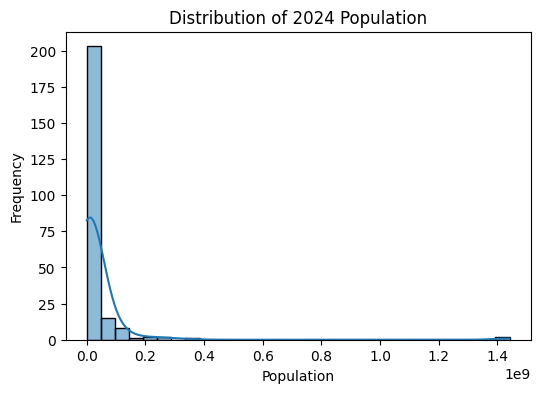

In [10]:
# Visualization the distribution of the population in 2024.
plt.figure(figsize=(6, 4))
sns.histplot(df['pop2024'], bins=30, kde=True)
plt.title('Distribution of 2024 Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

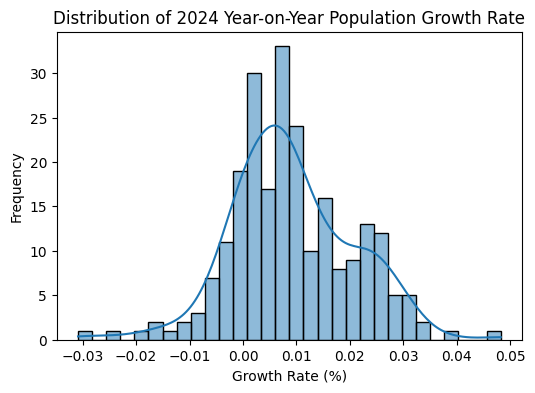

In [11]:
# Visualization the distribution of the population in 2024.
plt.figure(figsize=(6, 4))
sns.histplot(df['2024YoYGrowthRate'], bins=30, kde=True)
plt.title('Distribution of 2024 Year-on-Year Population Growth Rate')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Frequency')
plt.show()

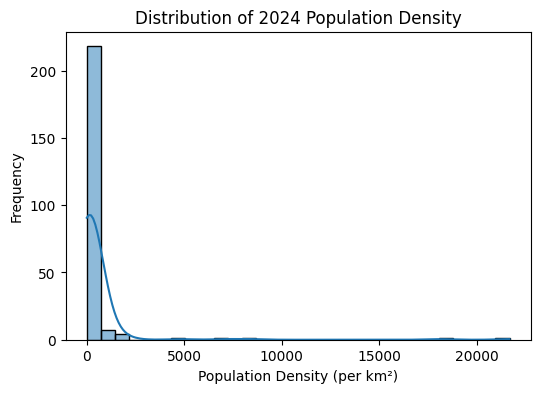

In [12]:
# Population density for 2024.
plt.figure(figsize=(6, 4))
sns.histplot(df['Density_2024'], bins=30, kde=True)
plt.title('Distribution of 2024 Population Density')
plt.xlabel('Population Density (per km²)')
plt.ylabel('Frequency')
plt.show()

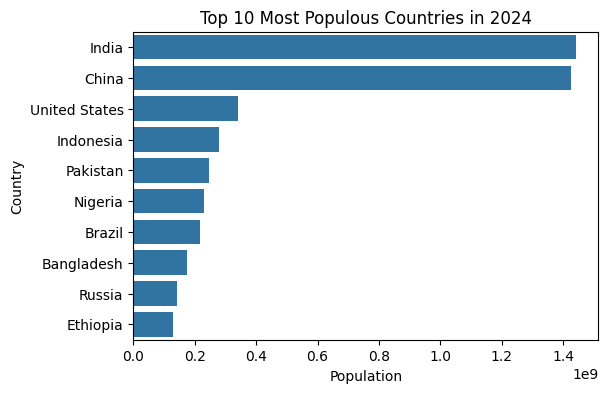

In [13]:
 # Top 10 most populous countries in 2024.
top_10_countries = df.nlargest(10, 'pop2024')

plt.figure(figsize=(6,4))
sns.barplot(x='pop2024', y='country', data=top_10_countries)
plt.title('Top 10 Most Populous Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

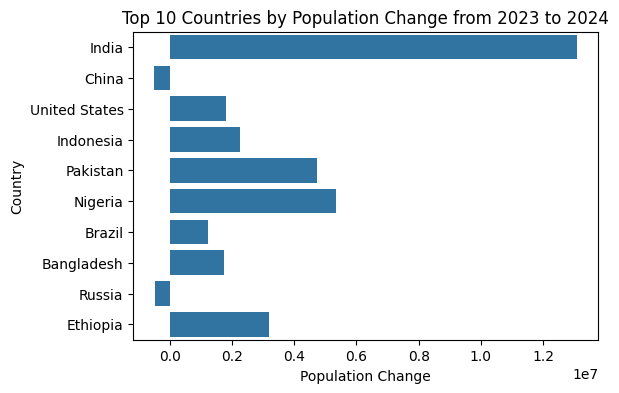

In [14]:
# Visualization the population change from 2023 to 2024.
plt.figure(figsize=(6,4))
sns.barplot(x='2024YoYChange', y='country', data=top_10_countries)
plt.title('Top 10 Countries by Population Change from 2023 to 2024')
plt.xlabel('Population Change')
plt.ylabel('Country')
plt.show()

In [15]:
# Select features for clustering
features = df[['2024YoYGrowthRate', 'Density_2024']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

  File "/home/user/workspace/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 250, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/usr/lib/python3.11/subprocess.py", line 1953, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)


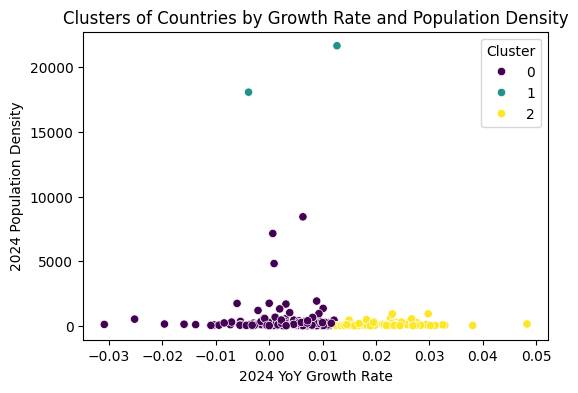

In [17]:
# Visualize clusters
plt.figure(figsize=(6,4))
sns.scatterplot(x='2024YoYGrowthRate', y='Density_2024', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Countries by Growth Rate and Population Density')
plt.xlabel('2024 YoY Growth Rate')
plt.ylabel('2024 Population Density')
plt.legend(title='Cluster')
plt.show()

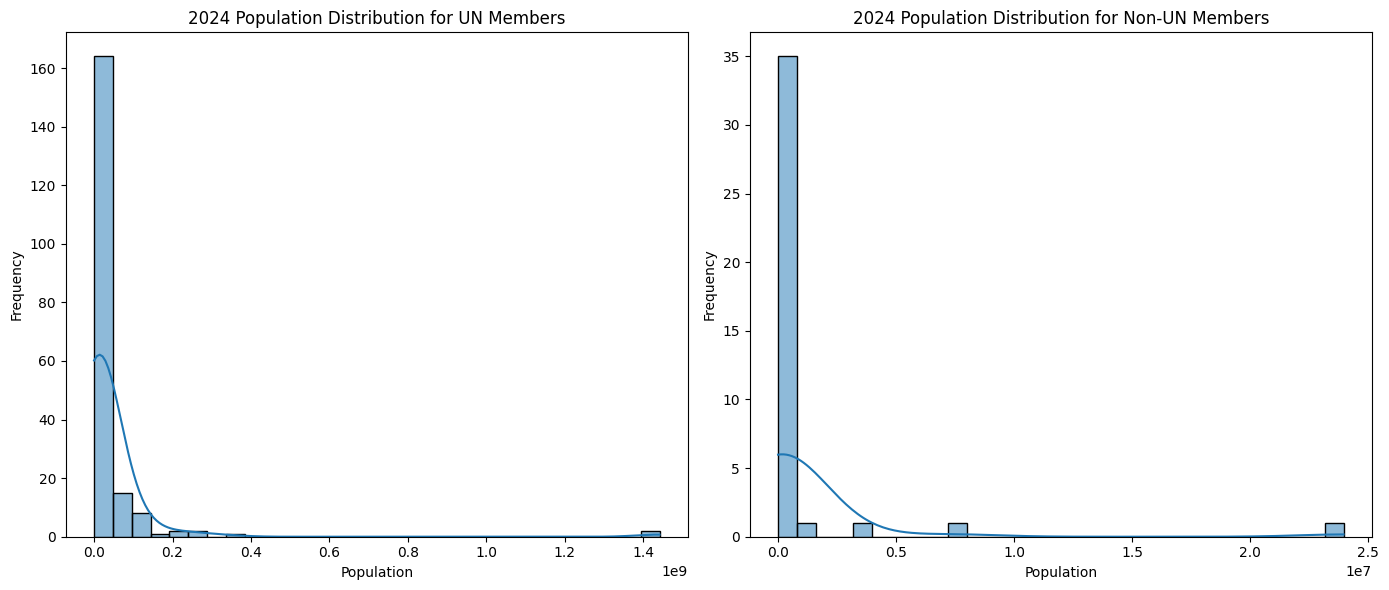

In [18]:
plt.figure(figsize=(14, 6))

# UN Members
plt.subplot(1, 2, 1)
sns.histplot(df[df['unMember'] == True]['pop2024'], bins=30, kde=True)
plt.title('2024 Population Distribution for UN Members')
plt.xlabel('Population')
plt.ylabel('Frequency')

# Non-UN Members
plt.subplot(1, 2, 2)
sns.histplot(df[df['unMember'] == False]['pop2024'], bins=30, kde=True)
plt.title('2024 Population Distribution for Non-UN Members')
plt.xlabel('Population')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

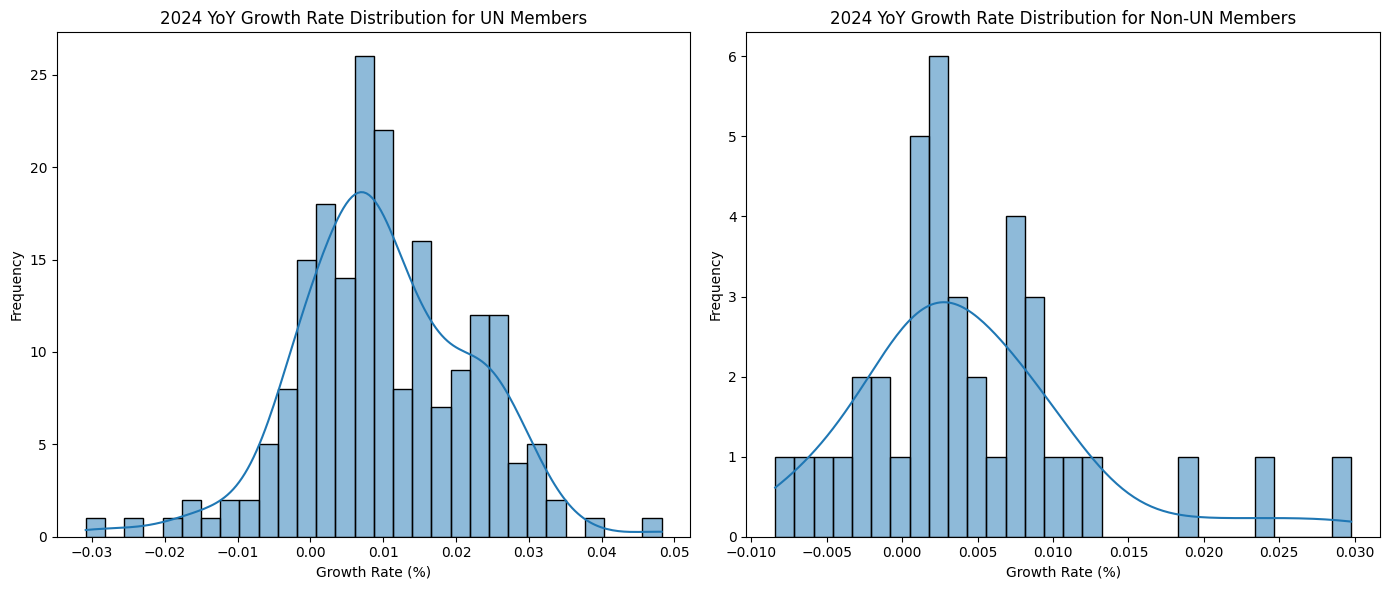

In [19]:
plt.figure(figsize=(14, 6))

# UN Members
plt.subplot(1, 2, 1)
sns.histplot(df[df['unMember'] == True]['2024YoYGrowthRate'], bins=30, kde=True)
plt.title('2024 YoY Growth Rate Distribution for UN Members')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Frequency')

# Non-UN Members
plt.subplot(1, 2, 2)
sns.histplot(df[df['unMember'] == False]['2024YoYGrowthRate'], bins=30, kde=True)
plt.title('2024 YoY Growth Rate Distribution for Non-UN Members')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

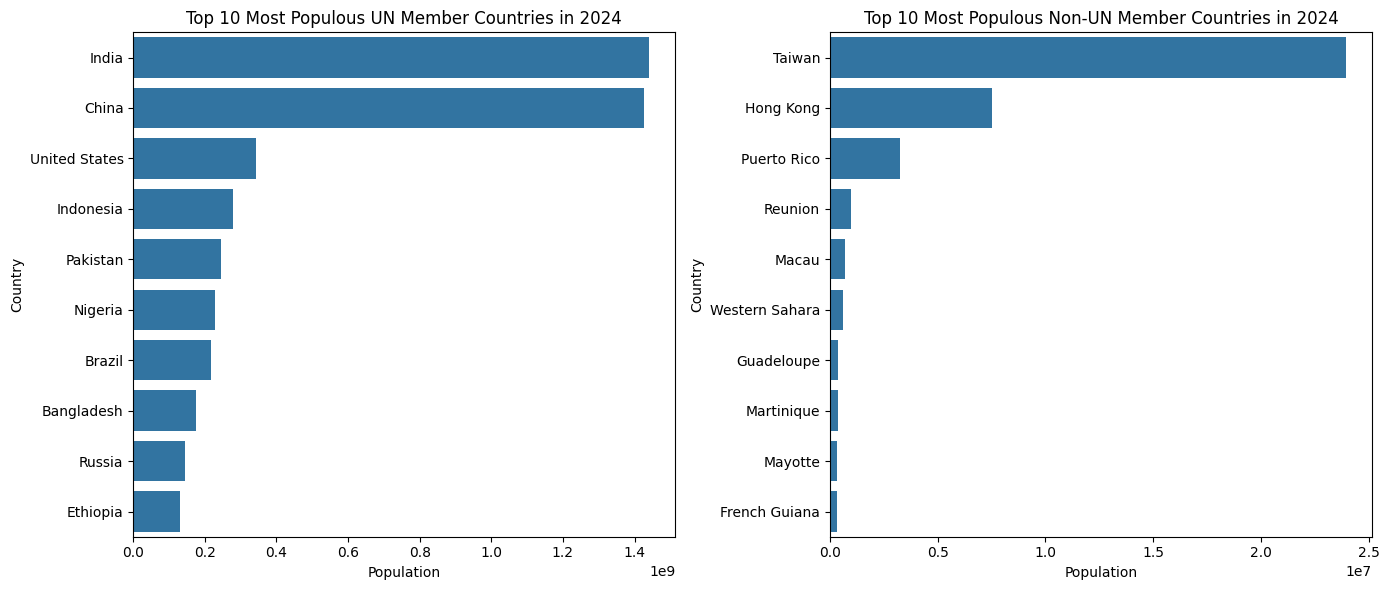

In [20]:
# Top 10 Most Populous Countries by UN Membership
# Top 10 UN Members
top_10_un_members = df[df['unMember'] == True].nlargest(10, 'pop2024')

plt.figure(figsize=(14, 6))

# UN Members
plt.subplot(1, 2, 1)
sns.barplot(x='pop2024', y='country', data=top_10_un_members)
plt.title('Top 10 Most Populous UN Member Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')

# Top 10 Non-UN Members
top_10_non_un_members = df[df['unMember'] == False].nlargest(10, 'pop2024')

# Non-UN Members
plt.subplot(1, 2, 2)
sns.barplot(x='pop2024', y='country', data=top_10_non_un_members)
plt.title('Top 10 Most Populous Non-UN Member Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')

plt.tight_layout()
plt.show()